<a href="https://colab.research.google.com/github/egy1st/denmune-clustering-algorithm/blob/main/characteristics/stability_vs_k__sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import os.path
import requests
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

!mkdir data #let us create data folder to hold our data

mkdir: cannot create directory ‘data’: File exists


In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune import DenMune

In [12]:
dataset = 'chars' # let us take Optical Characters dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
ground_ext = "-gt"


dataset_url = url + dataset + file_ext
groundtruth_url = url + dataset + ground_ext  + file_ext

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
data_file = data_path + dataset + file_ext #  i.e. 'iris' + '.txt' ==> iris.txt

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
data = genfromtxt(data_file , delimiter='\t') 

if  not os.path.isfile(data_path + dataset + ground_ext + file_ext):
    req = requests.get(groundtruth_url)
    with open(data_path + dataset +  ground_ext + file_ext, 'wb') as f:
        f.write(req.content)    
data_labels =  genfromtxt(groundtruth_url , delimiter='\t') #  i.e. 'iris' + + '-gt + '.txt' ==> iris-gt.txt 

data2d_ext = '-2d'
file_2d =  data_path + dataset + data2d_ext + file_ext # 'iris' + '-2d' + '.txt' ==> iris-2d.txt

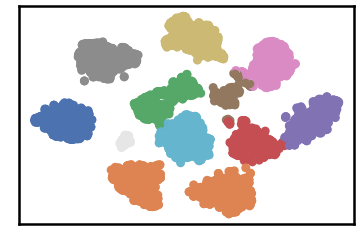

k= 149 F1 score is: 0.9377103253486169


In [17]:
# Denmune's Paramaters
verpose_mode = False # view in-depth analysis of time complexity and outlier detection, num of clusters
show_plot = False  # show plots on/off
show_noise = True # show noise and outlier on/off
data_stability = [] 

from IPython.display import clear_output
for knn in range (10, 150):
  clear_output(wait=True)
  dm = DenMune(data=data, file_2d=file_2d,  k_nearest=knn, verpose=verpose_mode, show_noise=show_noise, rgn_tsne=False)

  labels_pred = dm.fit_predict()
  dm.plot_clusters(labels=labels_pred, show_noise=show_noise)
  validity = dm.validate_Clusters(labels_true=data_labels, labels_pred=labels_pred)
   
  validity_key = "F1" # Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7       
  print ('k=' , knn, validity_key , 'score is:', validity[validity_key])
  data_stability.append([knn, validity[validity_key]])


In [18]:
x, y = zip(*data_stability)
window = 5
cumsum, moving_aves = [0], []

for i, n in enumerate(y, 1):
    cumsum.append(cumsum[i-1] + n)
    if i>=window:
        moving_ave = (cumsum[i] - cumsum[i-window])/window
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
y = moving_aves        

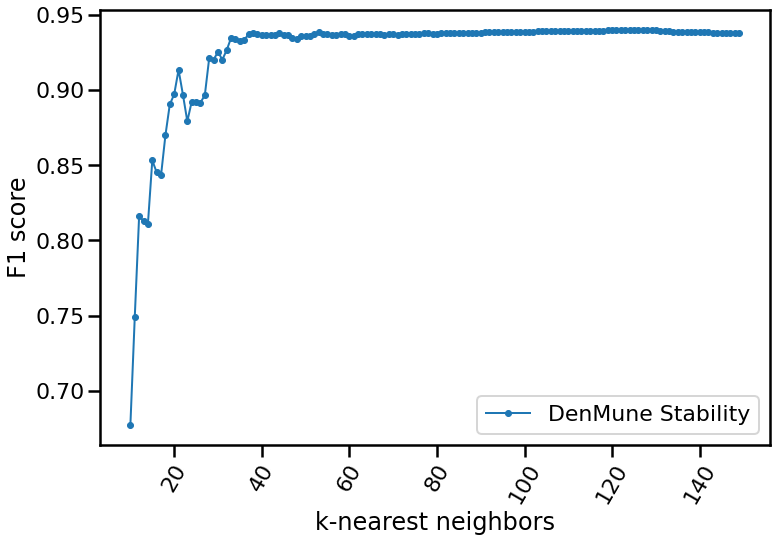

In [19]:
x, y = zip(*data_stability)
# Creating figure and axis objects using subplots()
fig, ax = plt.subplots(figsize=[12, 8])
ax.plot(x, y, marker='.', linewidth=2, label='DenMune Stability')
plt.xticks(rotation=60)
ax.set_xlabel('k-nearest neighbors')
ax.set_ylabel(validity_key + ' score')
plt.legend()
plt.show()